**An Introduction to the RDKit for Cheminformatics**

Import the necessary Python libraries

In [1]:
from rdkit import Chem #RDKit Chemistry
from rdkit.Chem.Draw import IPythonConsole #RDKit drawing
from rdkit.Chem import Draw #RDKit drawing
# A few settings to improve the quality of structures 
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import PandasTools #Add the ability to add a molecule to a dataframegrid
import mols2grid #The mols2grid library provides a convenient way of displaying molecules in a grid

Create a molecule (benzene) from a SMILES string

In [2]:
mol = Chem.MolFromSmiles("c1ccccc1")

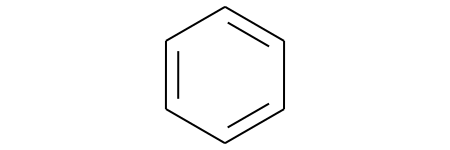

In [3]:
mol

Get SMILES fro Gleevec from ChEMBL

- [From ChEMBL](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL941)

In [4]:
glvc = Chem.MolFromSmiles("CN1CCN(Cc2ccc(cc2)C(=O)Nc3ccc(C)c(Nc4nccc(n4)c5cccnc5)c3)CC1")

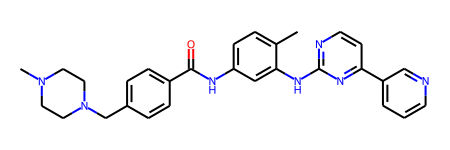

In [5]:
glvc

Read a set of molecules from an SD file

In [6]:
mols = [x for x in Chem.SDMolSupplier("example_compounds.sdf")]

In [7]:
mols

Draw these molecules as a grid

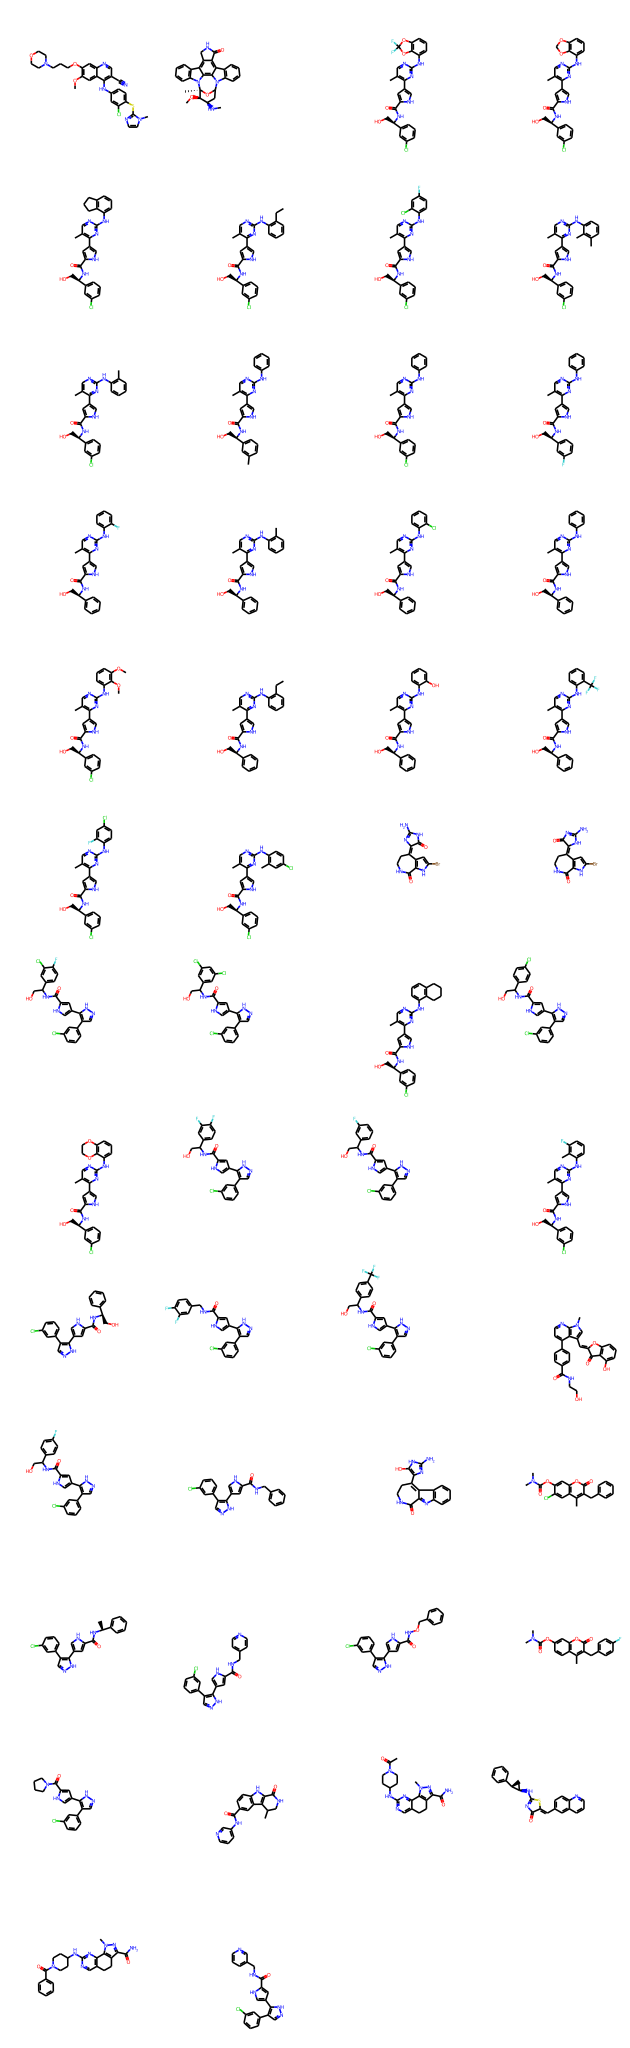

In [8]:
Draw.MolsToGridImage(mols,molsPerRow=4,useSVG=True)

We can use the mols2grid library to display molecules in a grid

In [9]:
mols2grid.display(mols)

In [11]:
mols2grid.selection

{0: 'COc1cc2c(Nc3ccc(Sc4nccn4C)c(Cl)c3)c(C#N)cnc2cc1OCCCN1CCOCC1',
 1: 'CN[C@@H]1CC2O[C@@](C)([C@@H]1OC)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4'}

We can also read an SD file into a Pandas dataframe. 

In [14]:
df = PandasTools.LoadSDF("example_compounds.sdf")

In [15]:
df.head()

AttributeError: module 'pandas.io.formats' has no attribute 'html'

                    ID                                              ROMol
0  168691 CHEMBL318804  <img data-content="rdkit/molecule" src="data:i...
1      86358 CHEMBL162  <img data-content="rdkit/molecule" src="data:i...
2  575087 CHEMBL576683  <img data-content="rdkit/molecule" src="data:i...
3  575065 CHEMBL571484  <img data-content="rdkit/molecule" src="data:i...
4  575047 CHEMBL568937  <img data-content="rdkit/molecule" src="data:i...

Let's add columns with molecular weight and LogP to the dataframe.

In [16]:
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
df['MW'] = [MolWt(x) for x in df.ROMol]
df['LogP'] = [MolLogP(x) for x in df.ROMol]

In [17]:
df.head()

AttributeError: module 'pandas.io.formats' has no attribute 'html'

                    ID                                              ROMol  \
0  168691 CHEMBL318804  <img data-content="rdkit/molecule" src="data:i...   
1      86358 CHEMBL162  <img data-content="rdkit/molecule" src="data:i...   
2  575087 CHEMBL576683  <img data-content="rdkit/molecule" src="data:i...   
3  575065 CHEMBL571484  <img data-content="rdkit/molecule" src="data:i...   
4  575047 CHEMBL568937  <img data-content="rdkit/molecule" src="data:i...   

        MW     LogP  
0  565.099  5.49788  
1  466.541  4.35400  
2  527.915  4.96202  
3  491.935  4.36922  
4  487.991  5.12922  

We can use a boxplot to examine the distribution of molecular weight within the dataframe. 

In [15]:
import seaborn as sns

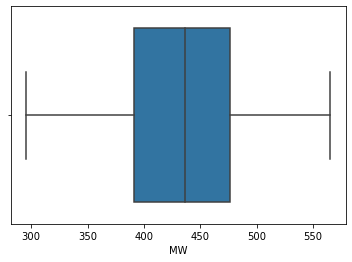

In [16]:
ax = sns.boxplot(x=df.MW)